<a href="https://colab.research.google.com/github/vinigm/Estudos/blob/main/S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Séries Temporais**
---

**Tópicos**
1. Introdução
2. Wrangling
3. Decomposição

**MOTIVAÇÃO**

Neste módulo, vamos analisar dados sobre o consumo de energia elétrica residencial, comercial e industrial, em mega watts (MWh), da região sudeste do Brasil, entre os anos de 2004 e 2020. O conjunto de dados está neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv) e foi inspirado no conjunto de dados da Empresa de Pesquisa Energética (EPE), estatal do governo vinculada ao ministério de minas e energia, presente neste [link](https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/consumo-de-energia-eletrica). 

In [6]:
import pandas as pd
import seaborn as sns

In [1]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [7]:
data = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [8]:
data.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [9]:
data.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   referencia   204 non-null    datetime64[ns]
 1   residencial  204 non-null    int64         
 2   industrial   204 non-null    int64         
 3   comercial    204 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.5 KB


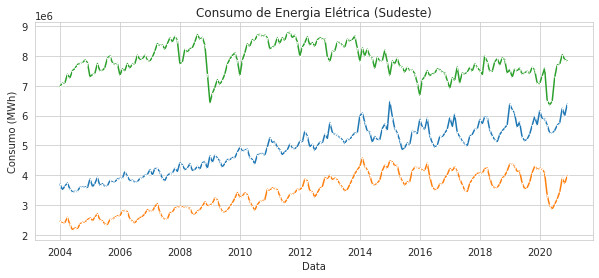

In [11]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=data, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=data, x='referencia', y='comercial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=data, x='referencia', y='industrial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

Uma **série temporal** é um conjunto de dados composto pela coleta de amostras de uma ou mais variáveis em intervalos **fixos** de tempo (granularidade). É muito utilizada para análise do mercado de renda variável, dados econômicos, consumo de energia elétrica, etc.

**WRANGLING**

Indexação:

In [12]:
data.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [13]:
data = data.set_index(keys=['referencia'])

In [14]:
data.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084
